In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



In [2]:
df = pd.read_csv(r'C:\Users\sharmaji\Downloads\Mall_Customers.csv')

In [3]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
df.drop('CustomerID', axis=1, inplace=True)
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


ANALYSIS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


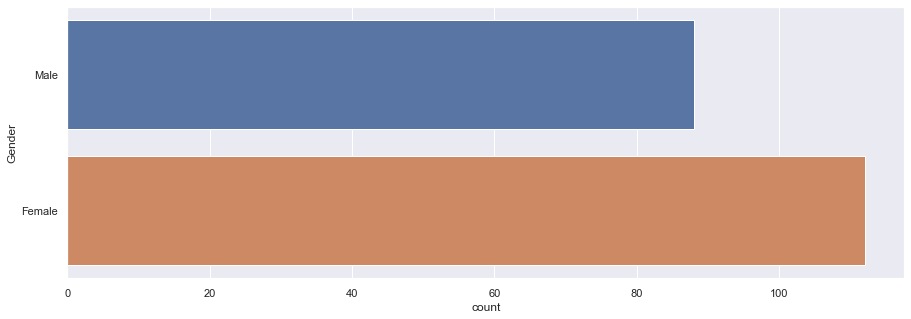

In [6]:
plt.figure(1 , figsize = (15 , 5))
sns.set(style="darkgrid")
ax = sns.countplot(y="Gender", data=df)

In [7]:
fig = px.scatter_matrix(df,
    dimensions=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], color='Gender')
fig.show()

In [8]:
fig = px.scatter_3d(df, x = 'Age', y='Annual Income (k$)', z='Spending Score (1-100)')
fig.show()


In [9]:
X = df.iloc[:,2:4].values

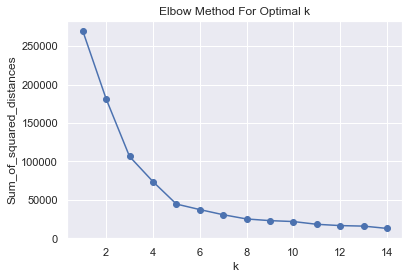

In [10]:
Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500,  tol=1e-04, random_state=0)
    km = km.fit(X)
    # Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [11]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))


For n_clusters=2, The Silhouette Coefficient is 0.2968969162503008
For n_clusters=3, The Silhouette Coefficient is 0.46761358158775435
For n_clusters=4, The Silhouette Coefficient is 0.4931963109249047
For n_clusters=5, The Silhouette Coefficient is 0.553931997444648
For n_clusters=6, The Silhouette Coefficient is 0.53976103063432
For n_clusters=7, The Silhouette Coefficient is 0.5264283703685728
For n_clusters=8, The Silhouette Coefficient is 0.4572211842776841
For n_clusters=9, The Silhouette Coefficient is 0.4595491760122954
For n_clusters=10, The Silhouette Coefficient is 0.45056557470336733


In [12]:
kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 500, n_init = 10, random_state = 123)
identified_clusters = kmeans.fit_predict(X)


data_with_clusters = df.copy()
data_with_clusters['Cluster'] = identified_clusters
fig = px.scatter_3d(data_with_clusters, x = 'Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='Cluster', opacity = 0.8, size='Age', size_max=30)
fig.show()